## **1. Mengimpor pustaka yang diperlukan**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## **2. Mengimpor dataset**

In [2]:
dataset = pd.read_csv('pet_adoption_data.csv')

In [3]:
print(dataset.head(10))

   PetID PetType             Breed  AgeMonths   Color    Size   WeightKg  \
0    500    Bird          Parakeet        131  Orange   Large   5.039768   
1    501  Rabbit            Rabbit         73   White   Large  16.086727   
2    502     Dog  Golden Retriever        136  Orange  Medium   2.076286   
3    503    Bird          Parakeet         97   White   Small   3.339423   
4    504  Rabbit            Rabbit        123    Gray   Large  20.498100   
5    505     Dog          Labrador         70   Brown   Large  20.986261   
6    506    Bird          Parakeet        169   Brown   Small  10.902613   
7    507     Cat           Siamese         13  Orange   Large   7.252683   
8    508    Bird          Parakeet         49   Brown  Medium  24.597598   
9    509    Bird          Parakeet         60    Gray   Large   7.295994   

   Vaccinated  HealthCondition  TimeInShelterDays  AdoptionFee  PreviousOwner  \
0           1                0                 27          140              0   
1

In [4]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2007 entries, 0 to 2006
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PetID               2007 non-null   int64  
 1   PetType             2007 non-null   object 
 2   Breed               2007 non-null   object 
 3   AgeMonths           2007 non-null   int64  
 4   Color               2007 non-null   object 
 5   Size                2007 non-null   object 
 6   WeightKg            2007 non-null   float64
 7   Vaccinated          2007 non-null   int64  
 8   HealthCondition     2007 non-null   int64  
 9   TimeInShelterDays   2007 non-null   int64  
 10  AdoptionFee         2007 non-null   int64  
 11  PreviousOwner       2007 non-null   int64  
 12  AdoptionLikelihood  2007 non-null   int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 204.0+ KB
None


In [5]:
# periksa nilai yang hilang di setiap kolom
print(dataset.isnull().sum())

PetID                 0
PetType               0
Breed                 0
AgeMonths             0
Color                 0
Size                  0
WeightKg              0
Vaccinated            0
HealthCondition       0
TimeInShelterDays     0
AdoptionFee           0
PreviousOwner         0
AdoptionLikelihood    0
dtype: int64


## **3. Encoding data kategori (Atribut)**

In [6]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = dataset.select_dtypes(include=['object']).columns
label_encoders = {}

for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    dataset[col] = label_encoders[col].fit_transform(dataset[col])

In [7]:
# definisikan kolom kategorikal dan numerik
# kolom_kategorikal = ['PetType', 'Breed', 'Color', 'Size']
# kolom_numerik = ['AgeMonths', 'WeightKg', 'TimeInShelterDays', 'AdoptionFee', 'PreviousOwner']

In [8]:
# from sklearn.preprocessing import LabelEncoder

# encoding kolom kategorikal
# label_encoder = LabelEncoder()
# for kolom in kolom_kategorikal:
#     dataset[kolom] = label_encoder.fit_transform(dataset[kolom])

In [9]:
print("Tipe data setelah encoding:")
print(dataset.dtypes)

Tipe data setelah encoding:
PetID                   int64
PetType                 int32
Breed                   int32
AgeMonths               int64
Color                   int32
Size                    int32
WeightKg              float64
Vaccinated              int64
HealthCondition         int64
TimeInShelterDays       int64
AdoptionFee             int64
PreviousOwner           int64
AdoptionLikelihood      int64
dtype: object


In [10]:
# Menampilkan dataset yang sudah diolah
dataset.head()

,PetID,PetType,Breed,AgeMonths,Color,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
0,500,0,2,131,3,0,5.039768,1,0,27,140,0,0
1,501,3,5,73,4,0,16.086727,0,0,8,235,0,0
2,502,2,0,136,3,1,2.076286,0,0,85,385,0,0
3,503,0,2,97,4,2,3.339423,0,0,61,217,1,0
4,504,3,5,123,2,0,20.498100,0,0,28,14,1,0


In [11]:
# Memilih fitur dan label
X = dataset.iloc[:, [5, 7]].values  
y = dataset.iloc[:, -1].values

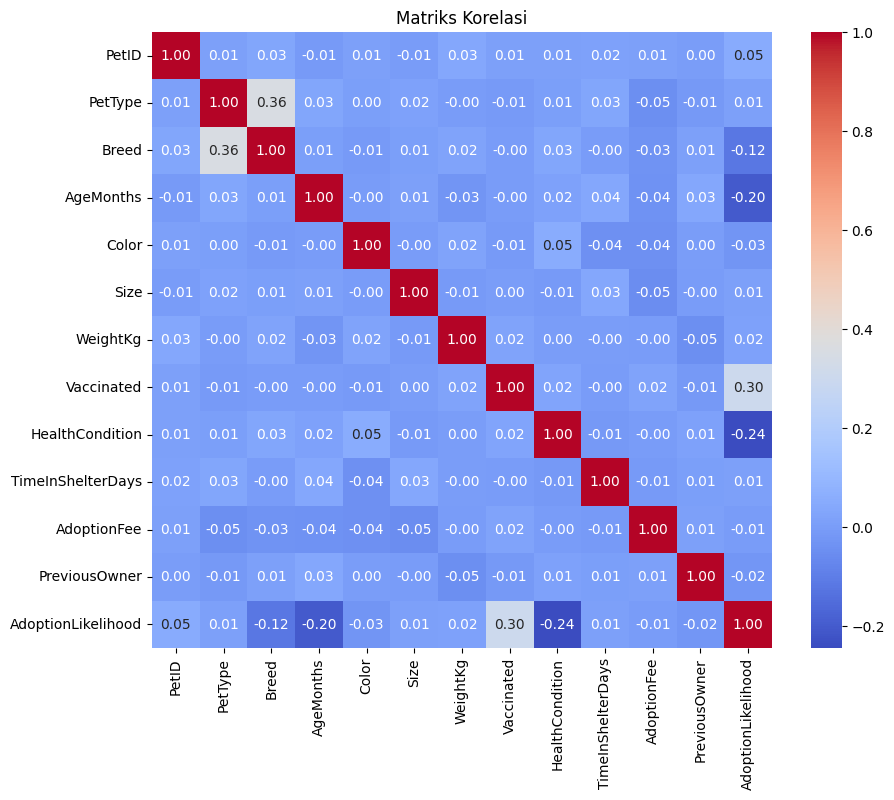

In [12]:
import seaborn as sns

numerical_data = dataset.select_dtypes(include=['number'])

# Menghitung matriks korelasi
correlation_matrix = dataset.corr()

# Visualisasi matriks korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriks Korelasi')
plt.show()


## **4. Pembagian dataset**

In [13]:
# Membagi dataset menjadi data pelatihan dan data pengujian
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [14]:
# 7. Memeriksa bentuk dan tipe data setelah pembagian
print("\nBentuk X_train:", X_train.shape)
print("Tipe data X_train:", X_train.dtype)


Bentuk X_train: (1605, 2)
Tipe data X_train: int64


In [15]:
# Menampilkan hasil pembagian
print("Ukuran X_train:", X_train.shape)
print("Ukuran X_test:", X_test.shape)
print("Ukuran y_train:", y_train.shape)
print("Ukuran y_test:", y_test.shape)

Ukuran X_train: (1605, 2)
Ukuran X_test: (402, 2)
Ukuran y_train: (1605,)
Ukuran y_test: (402,)


In [16]:
# Menampilkan nilai X_train dan y_train
print("\nFitur Pelatihan (X_train):")
print(X_train)
print("\nTarget Pelatihan (y_train):")
print(y_train)


Fitur Pelatihan (X_train):
[[1 1]
 [1 0]
 [0 0]
 ...
 [2 1]
 [0 1]
 [1 0]]

Target Pelatihan (y_train):
[1 0 0 ... 1 0 0]


In [17]:
# Menampilkan nilai X_test dan y_test
print("\nFitur Pengujian (X_test):")
print(X_test)
print("\nTarget Pengujian (y_test):")
print(y_test)


Fitur Pengujian (X_test):
[[1 1]
 [1 0]
 [2 1]
 [0 1]
 [0 1]
 [1 1]
 [2 1]
 [0 0]
 [2 0]
 [2 0]
 [0 1]
 [2 1]
 [0 1]
 [2 1]
 [2 1]
 [2 0]
 [2 1]
 [1 1]
 [2 1]
 [0 1]
 [1 0]
 [1 0]
 [1 1]
 [0 1]
 [2 0]
 [2 0]
 [2 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [2 1]
 [0 0]
 [2 1]
 [2 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 1]
 [0 1]
 [1 1]
 [2 1]
 [1 0]
 [0 1]
 [1 0]
 [2 1]
 [0 0]
 [2 0]
 [2 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [2 1]
 [1 1]
 [1 0]
 [2 0]
 [2 1]
 [0 1]
 [2 1]
 [2 0]
 [1 1]
 [2 1]
 [1 1]
 [0 1]
 [2 1]
 [0 1]
 [1 1]
 [2 1]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [0 1]
 [2 0]
 [2 1]
 [1 1]
 [2 1]
 [0 0]
 [2 1]
 [1 1]
 [2 1]
 [2 0]
 [0 1]
 [2 0]
 [0 1]
 [1 1]
 [2 1]
 [1 1]
 [2 1]
 [1 1]
 [2 0]
 [0 1]
 [2 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [2 1]
 [2 1]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 1]
 [1 0]
 [2 1]
 [2 1]
 [2 1]
 [1 1]
 [0 1]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [2 1]
 [1 0]
 [2 1]
 [2 1]
 [1 1]
 [1 1]
 [2 0]
 [2 0]
 [2 1]
 [0 1]
 [0 1]


## **5. Standardisasi fitur**

In [18]:
# Standarisasi kolom numerik
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  
X_test = scaler.transform(X_test)       

## **6. Pelatihan model Naive Bayes pada data pelatihan**

In [19]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

## **7. Prediksi hasil data pengujian**

In [20]:
y_pred = classifier.predict(X_test)

## **8. Evaluasi model**

In [21]:
# Menghitung dan menampilkan confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)  
print("\nConfusion Matrix:")
print(cm)                                
# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi Model Naive Bayes: {accuracy * 100:.2f}%')


Confusion Matrix:
[[254  16]
 [ 47  85]]
Akurasi Model Naive Bayes: 84.33%


## **9. Visualisasi hasil pelatihan**

C:\Users\RESTU\AppData\Local\Temp\ipykernel_1416\3221379748.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


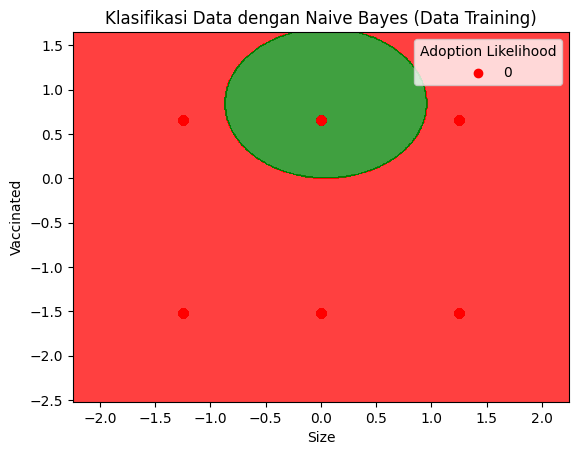

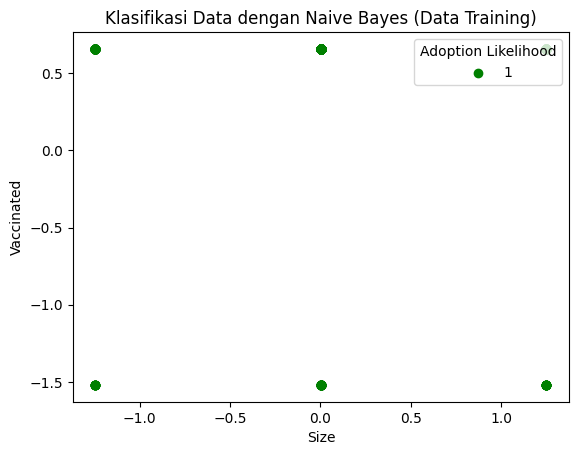

In [22]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
    plt.title('Klasifikasi Data dengan Naive Bayes (Data Training)')
    plt.xlabel('Size')
    plt.ylabel('Vaccinated')
    plt.legend(title='Adoption Likelihood', loc='upper right')
    plt.show()

## **10. Visualisasi hasil pengujian**

C:\Users\RESTU\AppData\Local\Temp\ipykernel_1416\160432737.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


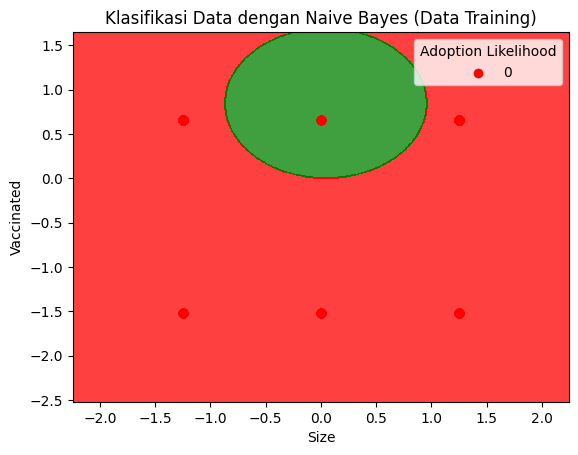

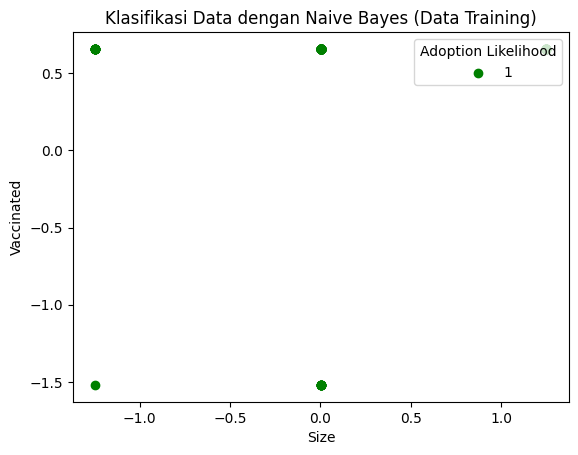

In [23]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
    plt.title('Klasifikasi Data dengan Naive Bayes (Data Training)')
    plt.xlabel('Size')
    plt.ylabel('Vaccinated')
    plt.legend(title='Adoption Likelihood', loc='upper right')
    plt.show()